In [44]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from PIL import Image

### Step 1: Download an image

Let's start by using some Ipython magic to download an image!

In [2]:
!wget -O - 'https://avatars2.githubusercontent.com/u/15658638?v=3&s=200' > ./img/input/tf_logo.png

--2017-12-02 19:20:57--  https://avatars2.githubusercontent.com/u/15658638?v=3&s=200
Resolving avatars2.githubusercontent.com... 151.101.208.133
Connecting to avatars2.githubusercontent.com|151.101.208.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7015 (6.9K) [image/png]
Saving to: 'STDOUT'

-                   100%[===================>]   6.85K  --.-KB/s    in 0.001s  

2017-12-02 19:20:58 (9.57 MB/s) - written to stdout [7015/7015]



### Step 2: Read and display the image

In [3]:
img = Image.open("./img/input/tf_logo.png")

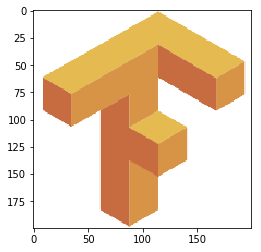

In [4]:
# first display the image as is
imshow(img)

As a sidenote, here is a some neat little iPython magic that can be used to increase the resolution of images rendered in the notebook.

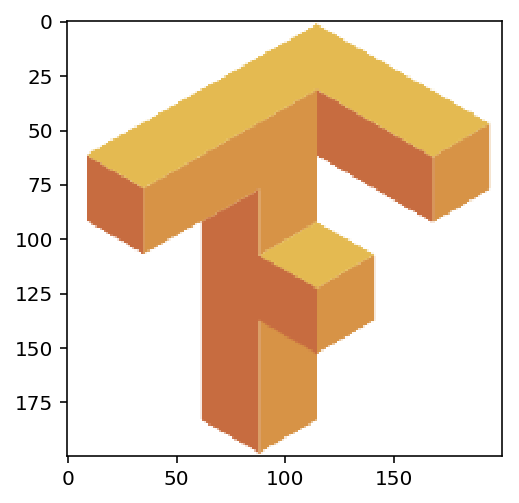

In [5]:
%config InlineBackend.figure_format = 'retina'
imshow(img)

### Step 3: Transforming the image to gray scale

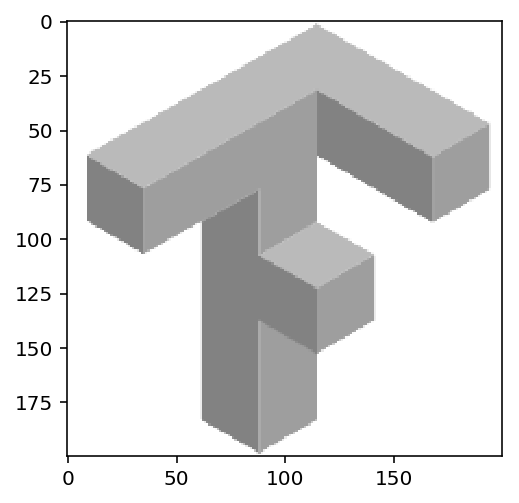

In [6]:
# the Python imaging Library allows to read the image in greyscale, but lets ignore that for now
img_la = Image.open("./img/input/tf_logo.png").convert('LA')
imshow(img_la)

The `get_gray_scale` function define below transforms an image to grayscale by applying a grayscale transformation to each pixel in the your image, and writing those to a new image object

In [7]:
def get_gray_scale(img):
    '''
    transform an image by applying a grayscale transformation to each pixel,
    and writing those to a new image object

    Parameters
    ----------
    img: an image object

    Returns
    -------
    df: a new image object in grayscale
    '''
    # Get size
    width, height = img.size

    # define new Image object
    img_gray = Image.new("RGB", (width, height), "white")
    pixels = img_gray.load()    

    for i in range(0, width):
        for j in range(0, height):
            pixel = img.getpixel((i, j))

            # Get R, G, B values (This are int from 0 to 255)
            red, green, blue =   pixel[0], pixel[1], pixel[2]

            # Transform to grayscale
            gray = (red * 0.299) + (green * 0.587) + (blue * 0.114)

            # Set Pixel in new image
            pixels[i, j] = (int(gray), int(gray), int(gray))
            
    return img_gray

In [8]:
img_gray = get_gray_scale(img)

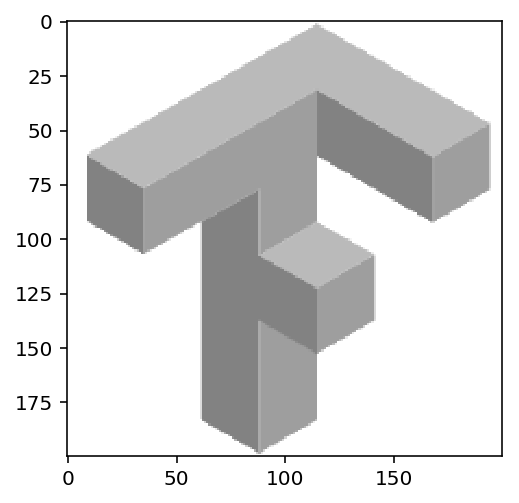

In [9]:
imshow(img_gray)

### Step 4: Thresholding your image to Black and White

Let's improve our function to allow for pixel intensity thresholding. In this case, if the `rgb_threshold` is set to `None` then the function is identical to `get_gray_scale`, otherwise it will set the pixel value to:
- black if the pixel value is below `rgb_threshold`
- white depending if the pixel value is above `rgb_threshold`

In [10]:
def get_bw_img(img, rgb_threshold=None):
    '''
    transform an image by applying a grayscale transformation to each pixel,
    and writing those to a new image object

    Parameters
    ----------
    img: an image object

    Returns
    -------
    df: a new image object in grayscale
    '''
    # Get size
    width, height = img.size
    
    # define new Image object
    img_threshold = Image.new("RGB", (width, height), "white")
    pixels = img_threshold.load()
    
    for i in range(0, width):
        for j in range(0, height):

            pixel = img.getpixel((i, j))

            # Get R, G, B values (This are int from 0 to 255)
            red, green, blue =   pixel[0], pixel[1], pixel[2]
            
            # Transform to grayscale
            gray = int((red * 0.299) + (green * 0.587) + (blue * 0.114))
            
            if rgb_threshold is None:
                # if no threshold is given, then apply grayscale
                pixels[i, j] = (int(gray), int(gray), int(gray))
            else:   
                if gray <= rgb_threshold:
                    # Set Pixel to black
                    pixels[i, j] = (0, 0, 0)
                else:
                    # Set Pixel to white
                    pixels[i, j] = (255, 255, 255)
            
    return img_threshold

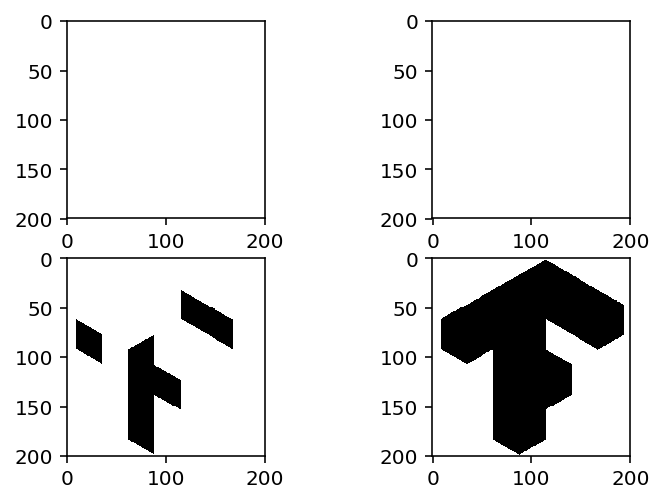

In [11]:
# plot 4 images as gray scale
plt.subplot(221)
img_threshold = get_bw_img(img, 50)
plt.imshow(img_threshold)

plt.subplot(222)
img_threshold = get_bw_img(img, 100)
plt.imshow(img_threshold)

plt.subplot(223)
img_threshold = get_bw_img(img, 150)
plt.imshow(img_threshold)

plt.subplot(224)
img_threshold = get_bw_img(img, 200)
plt.imshow(img_threshold)
# show the plot
#plt.show()

### Step 5: Regenerating the image with custom characters

With an image composed of only black and white pixels, we can now iterate through each pixel and depending on its values, plot any character of our choice at the corresponding pixel position.

In [27]:
# get a black and white version of our image
img_threshold = get_bw_img(img, 200)

In [28]:
# get size of the image
width, height = img_threshold.size
print(width, height)

200 200


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


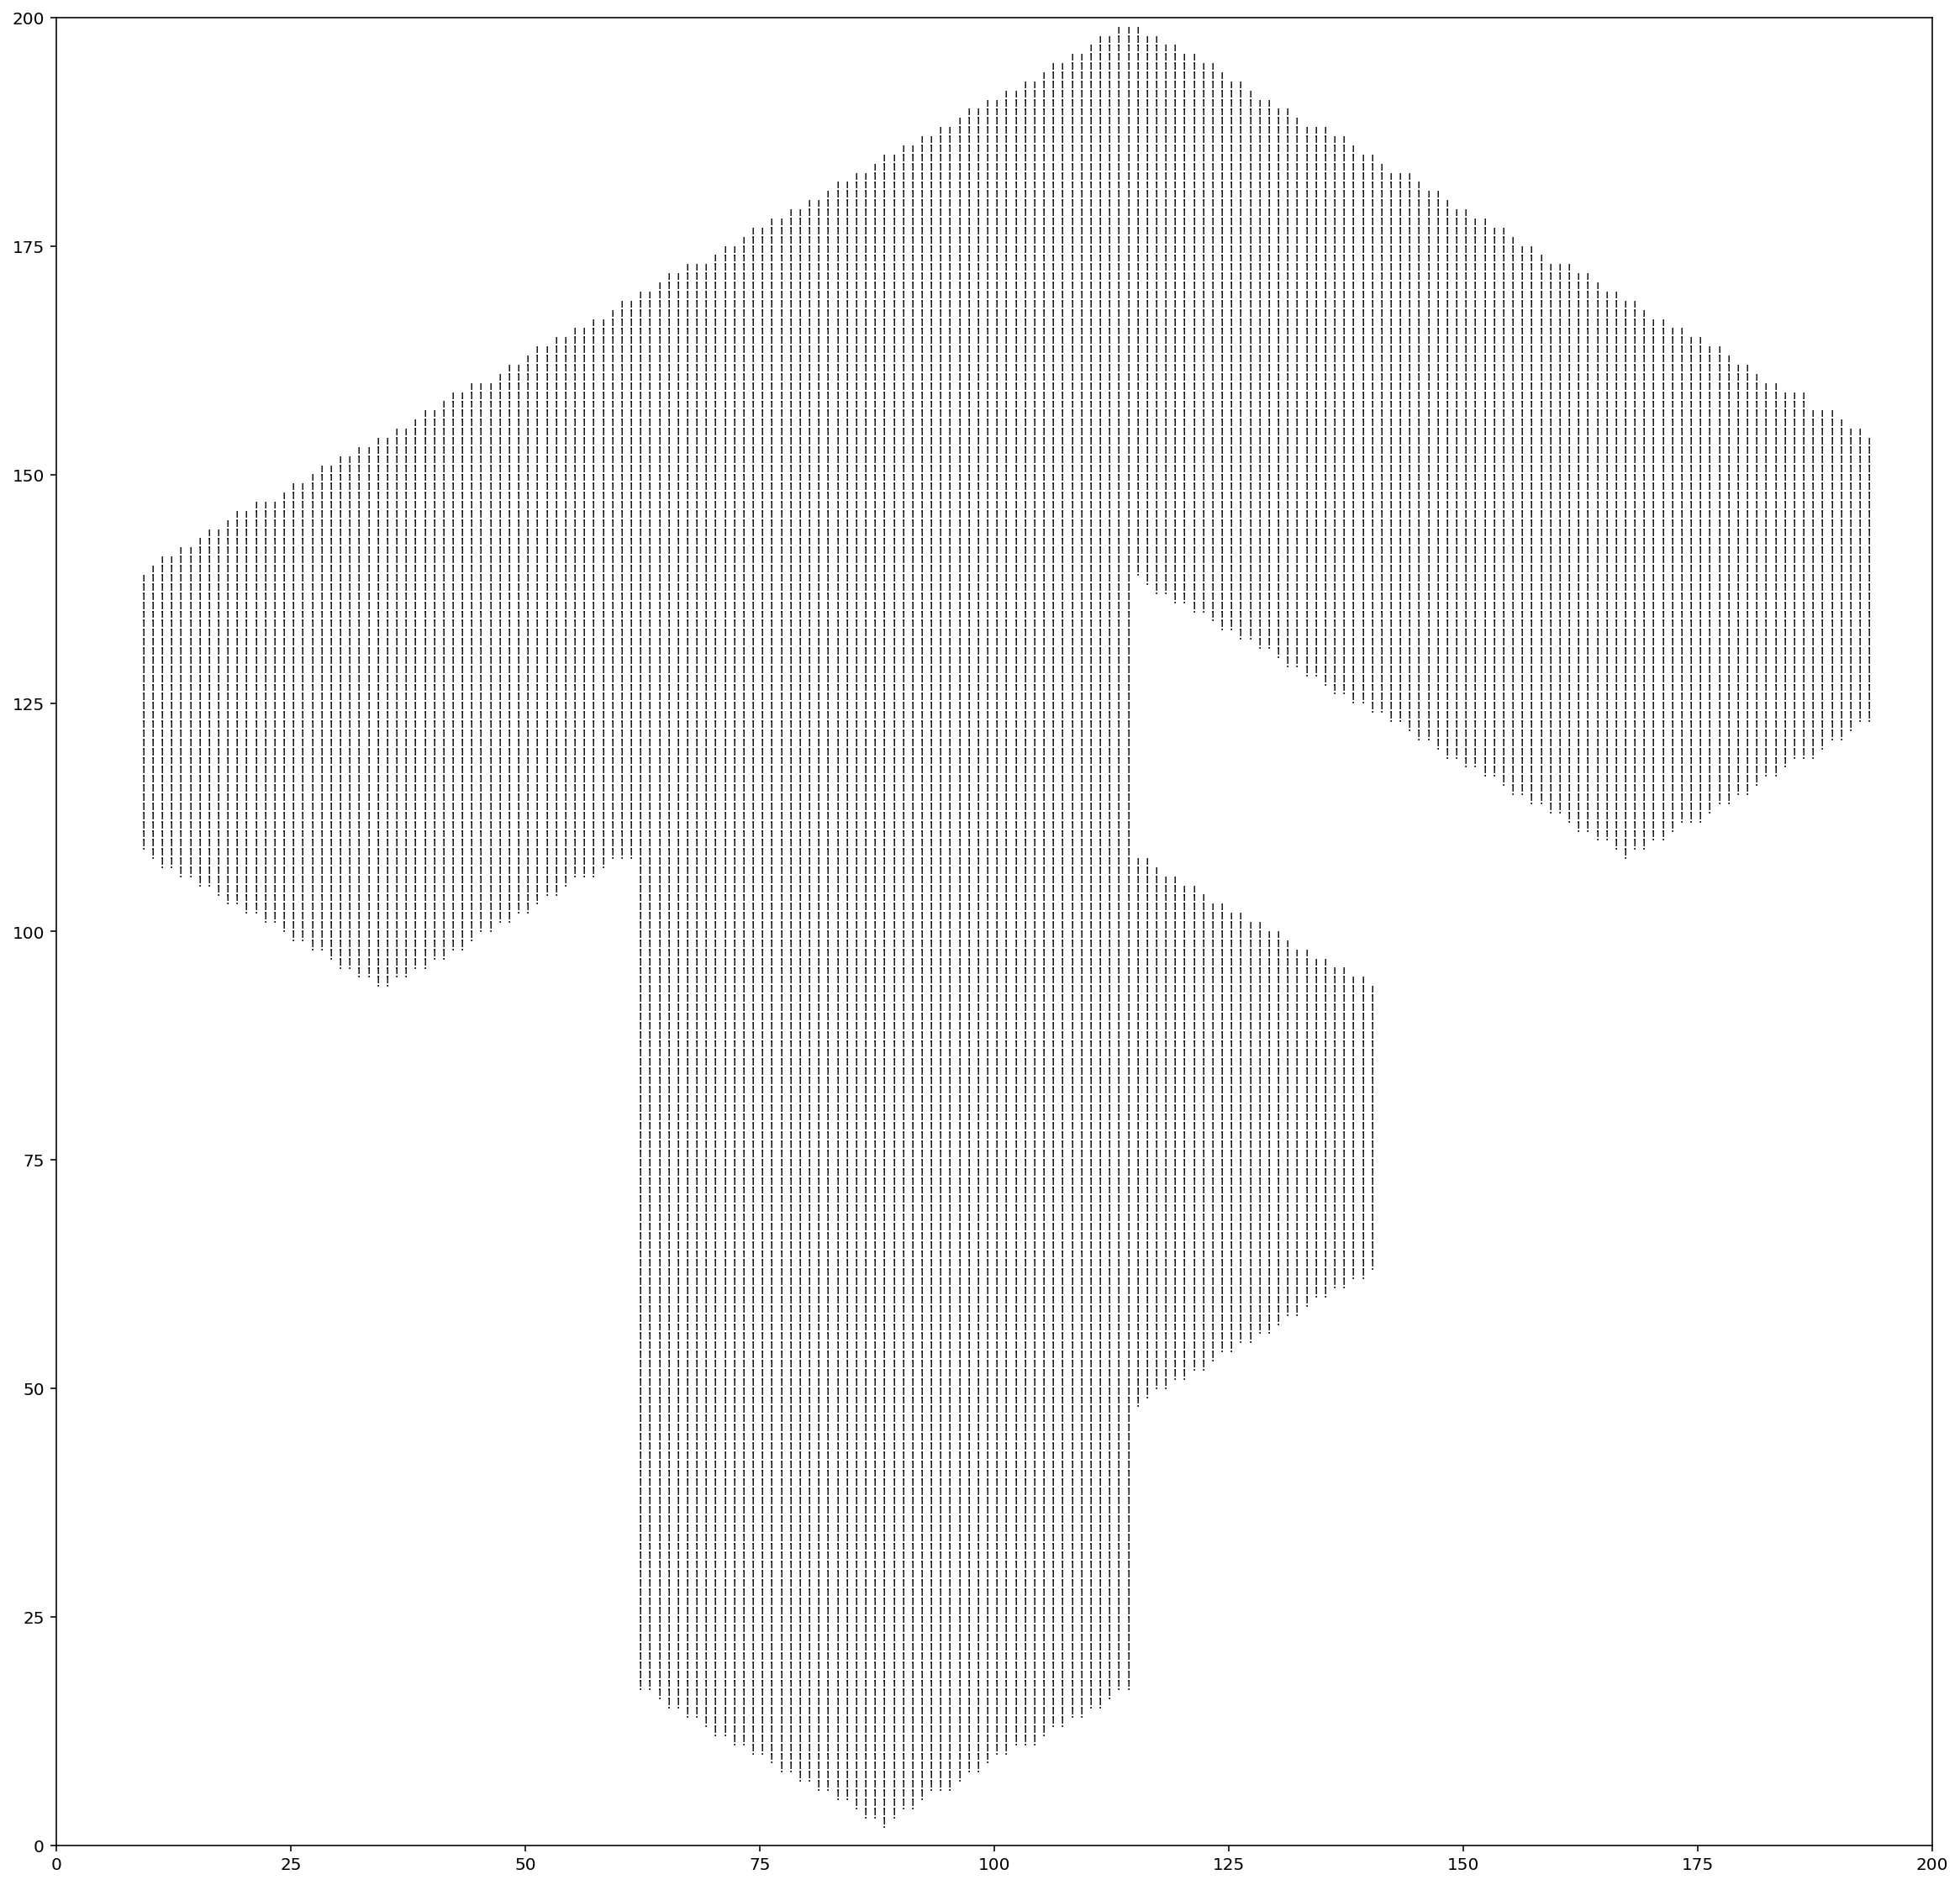

In [29]:
# initialize pot
%time
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlim(0,width)
ax.set_ylim(0, height)

for i in range(0, width):
    for j in range(0, height):
        pixel = img_threshold.getpixel((i, j))
        if np.sum(pixel) == 0:
            ax.annotate('!', xy=(i, height-j), fontsize=8)

If you've just ran this analysis, you will notice that it took a while to run. This is because of image is of dimensions 200x200, which means we have to iterate and plot through 40,000 pixel values! Furthermore, the large number of pixels means that the space between neighboring pixels overlap and reduces visibility. Fortunately, we can resolve this issue by simply resizing our image, which can be done in one line of code.

In [21]:
# define new image size
height = 50
width = 50
size = height, width

# resize black and white images to desired dimensions
img_resized = img_gray.resize(size, Image.ANTIALIAS)
img_resized = get_bw_img(img_resized, 200)

Now let's replot our image using characters instead. You can see how the plot is generate a lot faster!

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


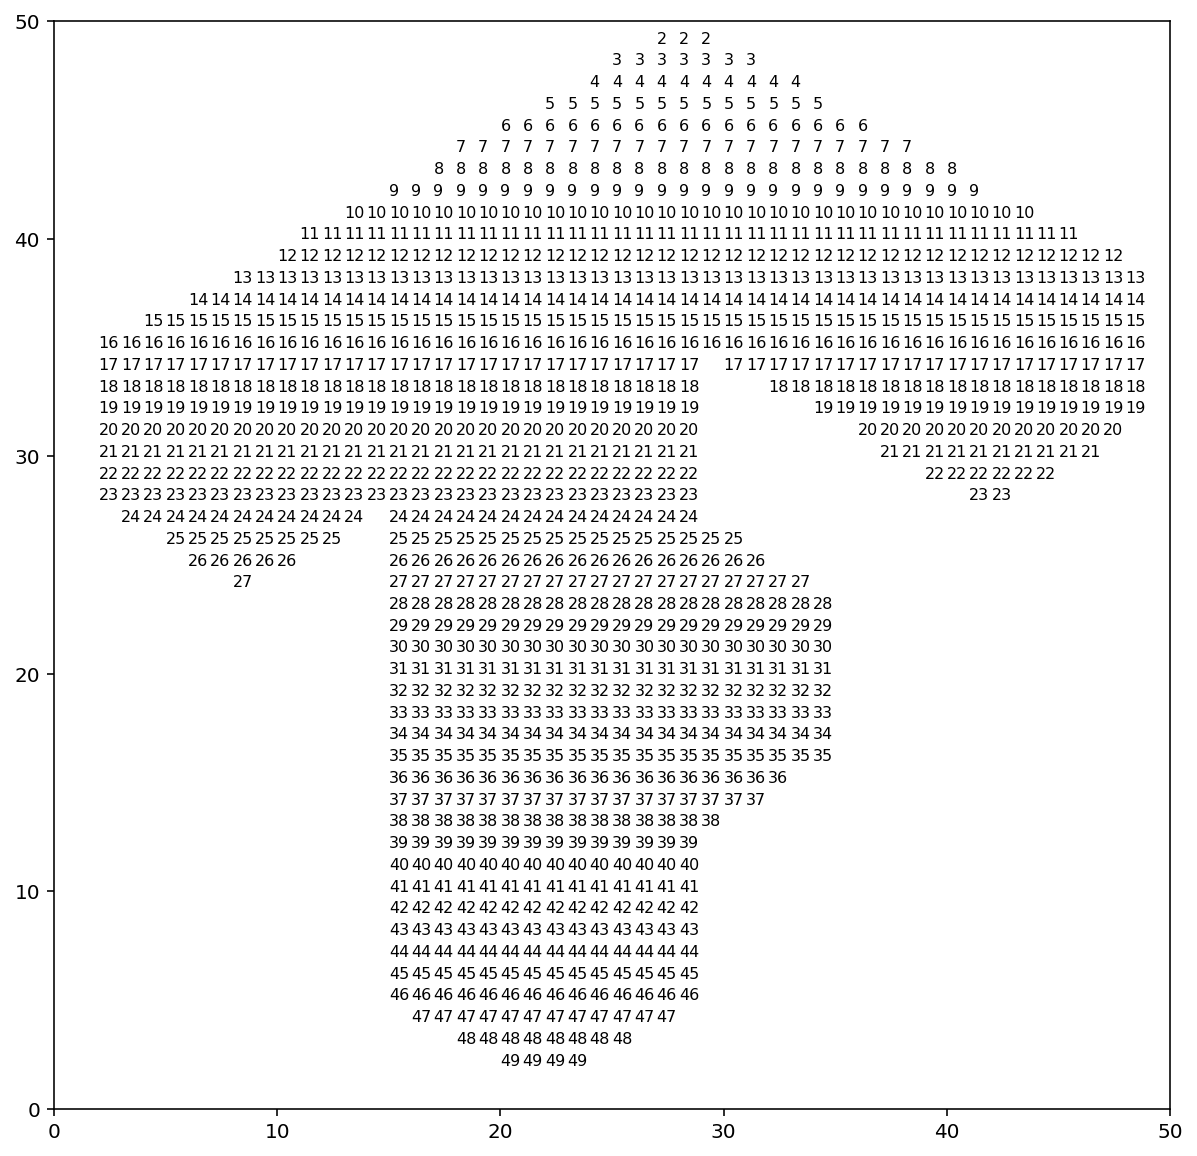

In [31]:
%time
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0,width)
ax.set_ylim(0, height)

counter = 0
for i in range(0, height):
    counter += 1
    for j in range(0, width):
        pixel = img_resized.getpixel((j, i))
        if np.sum(pixel) == 0:
            ax.annotate(counter, xy=(j, height-i), fontsize=8)
            #ax.annotate(counter, xy=(i, height-j), fontsize=8)
            #ax.annotate(counter, xy=(j, i), fontsize=8)

### Step 5: Personalizing your img2plot

We were previously using numbers, because it is helpful to see the order in which pixels are rendered on the graph. However, we can now go beyond that and personalize our plots a little bit more. Let's start by using the `@` symbol instead!

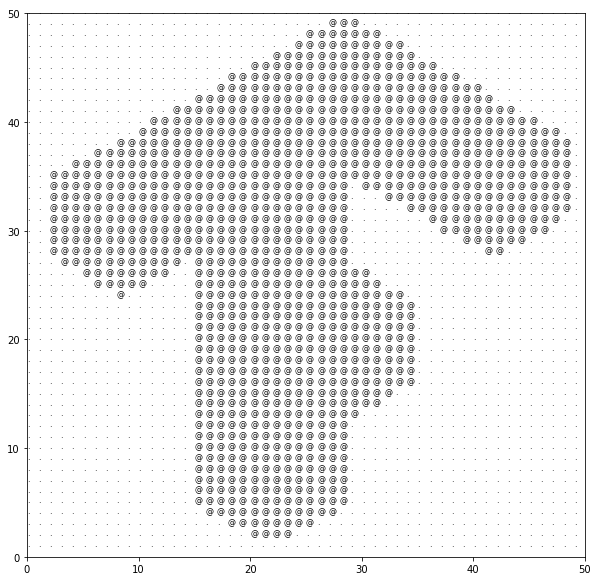

In [294]:
height, width = img_resized.size

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0,width)
ax.set_ylim(0, height)

for i in range(0, height):
    counter += 1
    for j in range(0, width):
        pixel = img_resized.getpixel((j, i))
        
        if np.sum(pixel) == 0:
            ax.annotate('@', xy=(j, height-i), fontsize=8)
        else:
            ax.annotate('.', xy=(j, height-i), fontsize=8)

Great! It works, so let's try with some text data now.

In [32]:
#text = [x.lower() for x in list(text[1].values[0][1]) if x !=' ']
text = [x.lower() for x in list('hello world!')]

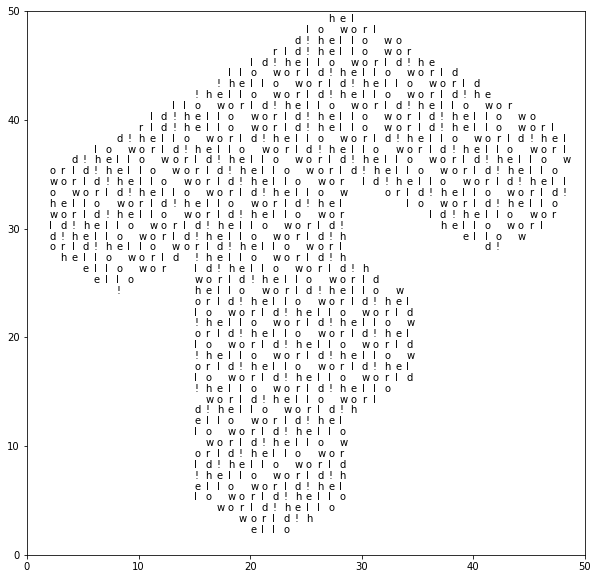

In [293]:
width, height = img_resized.size

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0,width)
ax.set_ylim(0, height)

counter = -1
for i in range(0, width):
    for j in range(0, height):
        pixel = img_resized.getpixel((j, i))
        
        if np.sum(pixel) == 0:
            counter += 1
            if counter == len(text):
                counter = 0
            ax.annotate(text[counter], xy=(j, height-i), fontsize=10)

That looks a little bit confusing, but maybe it will be a little clearer if we use longer strings instead. Let's try again, but this time using the content of Albert Einstein's Wikipedia page.

In [45]:
rawtext = pd.read_html('https://en.wikipedia.org/wiki/Albert_Einstein')

In [54]:
text = ' '.join(list(itertools.chain.from_iterable(rawtext[1].values)))

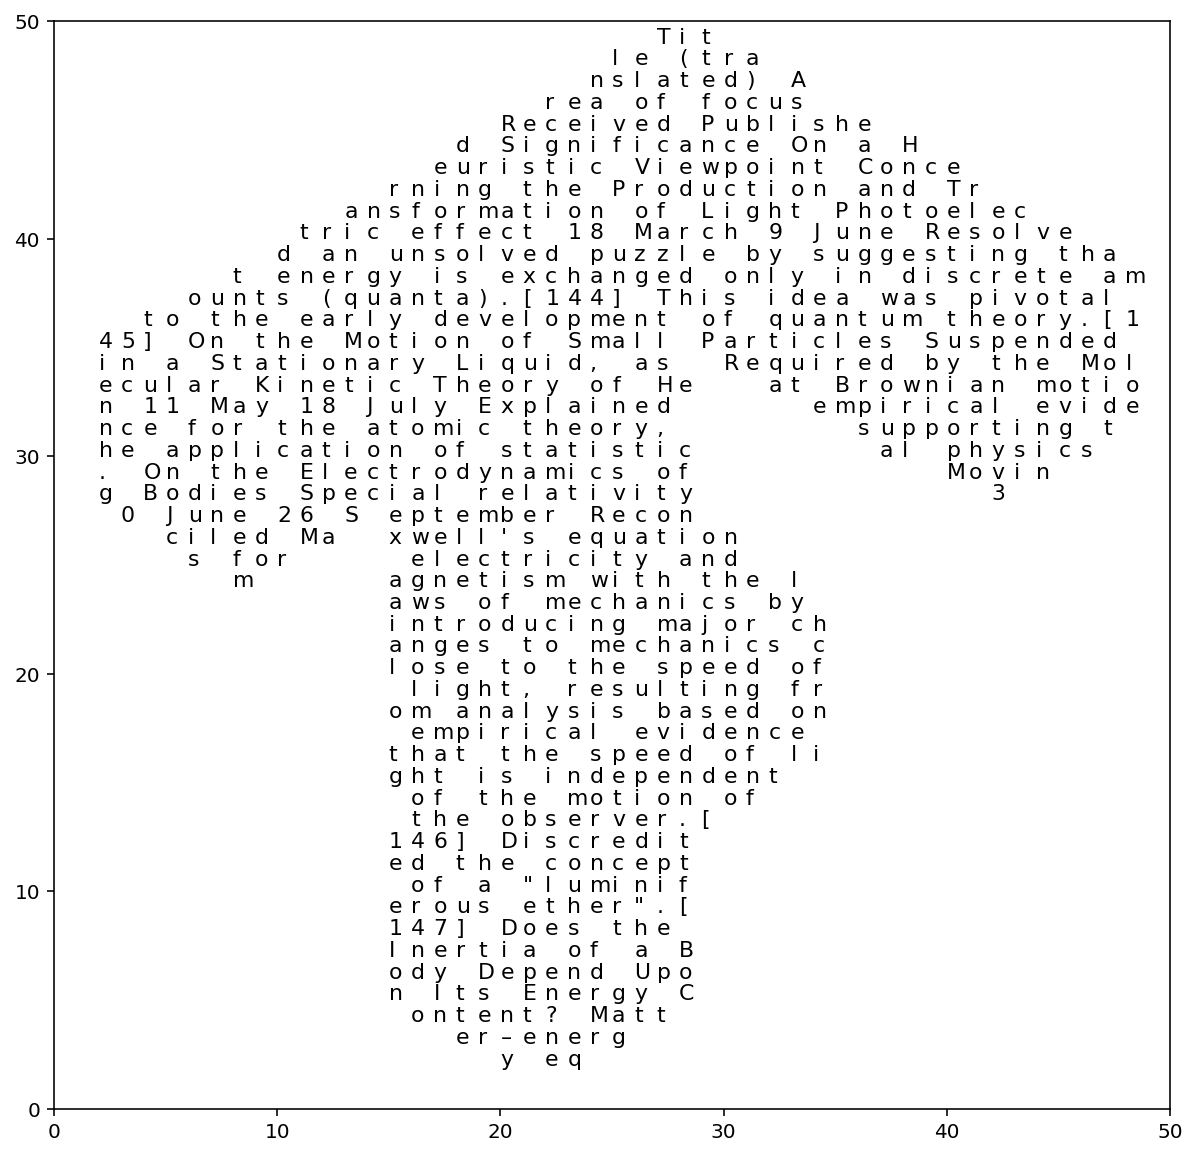

In [55]:
width, height = 50, 50

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0,width)
ax.set_ylim(0, height)

counter = -1
for i in range(0, width):
    for j in range(0, height):
        pixel = img_resized.getpixel((j, i))
        
        if np.sum(pixel) == 0:
            counter += 1
            if counter == len(text):
                counter = 0
            ax.annotate(text[counter], xy=(j, height-i), fontsize=11)

Let's switch the default matplolib style to make things a bit prettier.

In [58]:
plt.style.use('ggplot')

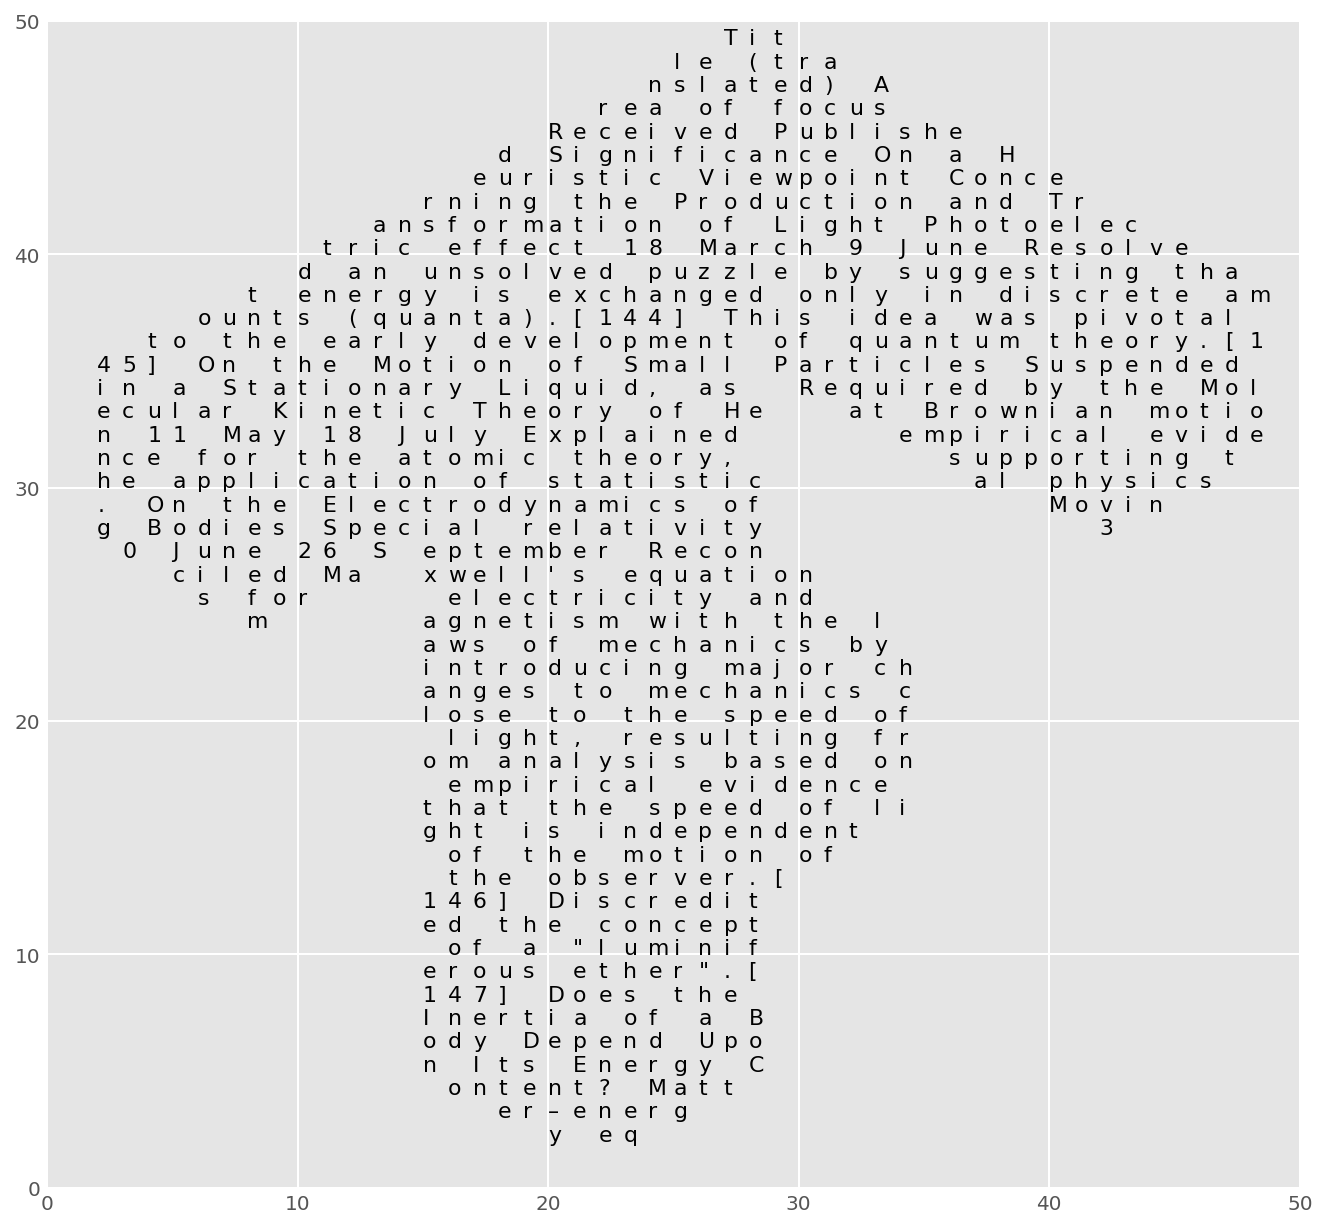

In [59]:
width, height = 50, 50

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0,width)
ax.set_ylim(0, height)

counter = -1
for i in range(0, width):
    for j in range(0, height):
        pixel = img_resized.getpixel((j, i))
        
        if np.sum(pixel) == 0:
            counter += 1
            if counter == len(text):
                counter = 0
            ax.annotate(text[counter], xy=(j, height-i), fontsize=11)